In [1]:
import numpy as np
import matplotlib.pylab as plt

# Frenk Kontoraoval model for dislocation

 * [Frenkel–Kontorova model on wikipedia](https://en.wikipedia.org/wiki/Frenkel%E2%80%93Kontorova_model)

In [3]:
def force(xi, k, l):
    f = np.zeros_like(xi)
    f[1:-1] = k*(xi[2:] + xi[0:-2] - 2*xi[1:-1])
    f[0] = k*(xi[1]-xi[0]-l)
    f[-1] = -k*(xi[-1]-xi[-2]-l)
    f += -np.cos(2*np.pi*xi)
    return f


def energie(xi, k, l):
    dxi = np.diff(xi, append=xi[-1]+l)
    E = .5*k*(dxi - l)**2 + 1/2/np.pi*np.sin(2*np.pi*xi)
    return np.sum(E)

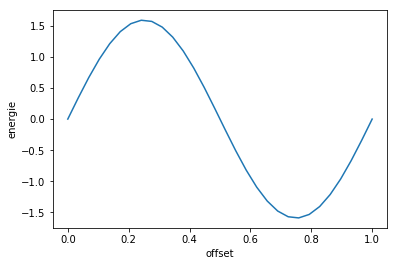

In [5]:
# Graph
k, l = 0.1, 1

offset = np.linspace(0, 1, 30)

E = [energie(l*np.arange(10) + phi, k, l) for phi in offset]

plt.plot(offset, E); plt.xlabel('offset'); plt.ylabel('energie');

## Déplacement à gauche imposé

In [8]:
def solve(xi, k, l, x_left=None):
    xi = xi.copy()
    
    gamma = 0.015
    for i in range(380):
            
        F = force(xi, k, l)
        dx = gamma * F
        if x_left:
            dx[0] = 0
            
        xi = xi + dx
        
        if np.max(np.abs(dx)) < 1e-3:
            break
            
    else:
        print('no convergence')
        
    return xi

no convergence


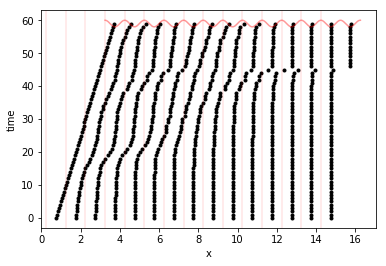

In [9]:
k, l = 10., 1.00
v = 0.05

f_zero = []
xi = np.arange(15) + 3/4
#xi[6:] -= 0.5
for i in range(60):
    plt.plot(xi, [i]*len(xi), '.k')
    xi[0] += v
    xi = solve(xi, k, l, x_left=True)

    f_zero.append( force(xi, k, l)[0] )
     
plt.xlabel('x'); plt.ylabel('time');

xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, i+np.sin(2*np.pi*xp), 'r', alpha=0.4);

for xv in np.arange(len(xi)):
    plt.axvline(x=xv+.25, color='r', alpha=0.1)

## Avec une force imposée

In [10]:
def force(xi, f_ext, k, l):
    
    f = np.zeros_like(xi)
    f[1:-1] = k*(xi[2:] + xi[0:-2] - 2*xi[1:-1])
    f[0] = k*(xi[1]-xi[0]-l)
    f[-1] = -k*(xi[-1]-xi[-2]-l)
    f += -np.cos(2*np.pi*xi) + f_ext
    
    return f


def solve(xi, f_ext, k, l, x_left=None, n=250):
    xi = xi.copy()
    
    gamma = 0.025
    for i in range(n):
            
        F = force(xi, f_ext, k, l)
        dx = gamma * F
        if x_left:
            dx[0] = 0
            
        xi = xi + dx
        
        if np.max(np.abs(dx)) < 1e-4:
            break
            
    else:
        pass
        #print('no convergence')
        
    return xi

In [11]:
def E_pot(xp):
    '''energie potentiel'''
    return np.sin(2*np.pi*xp)

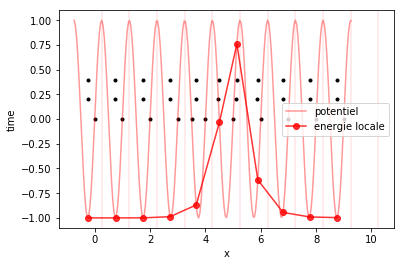

In [14]:
k, l = 5, 1.0
f_ext = .0300

f_zero = []
xi = np.array( [*range(4), 3.5, *range(4, 10)] )

for i in range(3):
    plt.plot(xi, [0.2*i]*len(xi), '.k')
    xi[0] += v
    xi = solve(xi, f_ext, k, l, x_left=False)

    f_zero.append( force(xi, f_ext, k, l)[0] )
     
plt.xlabel('x'); plt.ylabel('time');

xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4, label='potentiel');
plt.plot(xi, E_pot(xi), '-or', alpha=0.8, label='energie locale');

for xv in np.arange(len(xi)):
    plt.axvline(x=xv+.25, color='r', alpha=0.1)
    
plt.legend();

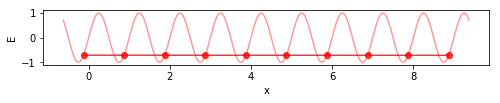

In [15]:
k, l = 5, 1.00
f_ext = .7

f_zero = []
xi = np.array( [*range(4), *range(4, 10)], dtype=float )

for i in range(3):
    #plt.plot(xi, [0.2*i]*len(xi), '.k')
    xi[0] += v
    xi = solve(xi, f_ext, k, l, x_left=False)

    f_zero.append( force(xi, f_ext, k, l)[0] )
     
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');

xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);

# Dislocation

## insertion d'un atome intermédiaire

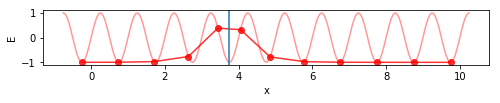

In [16]:
k, l = 5, 1.00
f_ext = 0.

f_zero = []
xi = np.array( [*range(-1, 3), 2.5, *range(3, 10)], dtype=float )+0.82

xi = solve(xi, f_ext, k, l, x_left=False)
     
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');

xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);


# Dislocation position
x_dislocation = np.sum( np.abs(xi[1:]-xi[:-1]-1) * (xi[1:]+xi[:-1])/2 )
plt.axvline(x=x_dislocation);

## Retrait d'un atome

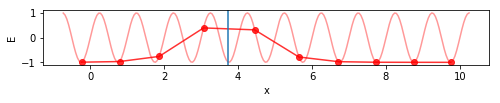

In [18]:
k, l = 5, 1.00
f_ext = 0.

f_zero = []
xi = np.array( [*range(-1, 3), *range(4, 10)], dtype=float )+0.82

xi = solve(xi, f_ext, k, l, x_left=False)
     
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');

xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);

# Dislocation position
x_dislocation = np.sum( np.abs(xi[1:]-xi[:-1]-1) * (xi[1:]+xi[:-1])/2 )
plt.axvline(x=x_dislocation);

## Avec une force exterieure: mouvement

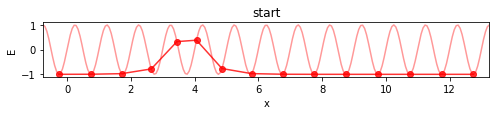

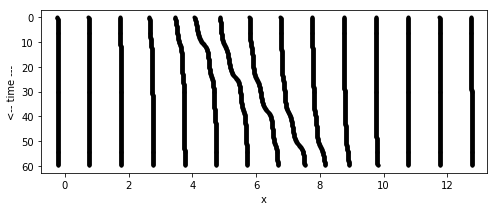

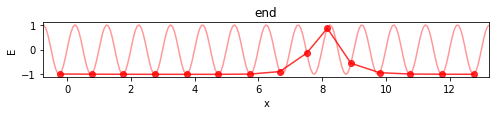

In [23]:
k, l = 5, 1.00
f_ext = 0.04

xi = np.array( [*range(3), 3.5, *range(3, 14)], dtype=float )
xi = solve(xi, 0, k, l, x_left=False)
    
xlim = (-0.5+np.min(xi), 0.5+np.max(xi))

# Start graph
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');
xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.title('start')
plt.xlim(xlim);

# in time
plt.figure(figsize=(8,3))
for i in range(300):
    plt.plot(xi, [0.2*i]*len(xi), '.k')
    xi[0] += v
    xi = solve(xi, f_ext, k, l, x_left=False, n=5)

     
plt.gca().invert_yaxis()
plt.xlabel('x'); plt.ylabel('<-- time ---');
plt.xlim(xlim);

# end graph
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');
xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.xlim(xlim); plt.title('end');


## Repulsion de deux dislocations ?

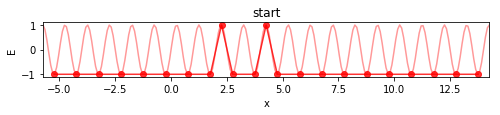

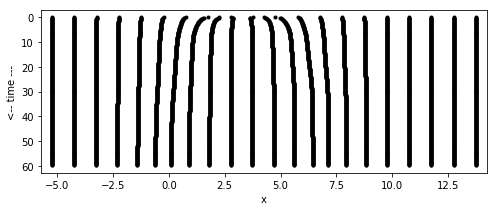

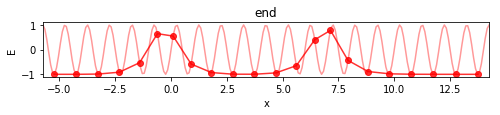

In [29]:
k, l = 8, 1.00
f_ext = 0

xi = np.array( [*range(-5, 0), *range(3), 2.5, *range(3, 5), 4.5, *range(5, 15)], dtype=float ) - 0.24
#xi = solve(xi, 0, k, l, x_left=False)
    
xlim = (-0.5+np.min(xi), 0.5+np.max(xi))

# Start graph
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');
xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.title('start')
plt.xlim(xlim);

# in time
plt.figure(figsize=(8,3))
for i in range(300):
    plt.plot(xi, [0.2*i]*len(xi), '.k')
    xi[0] += v
    xi = solve(xi, f_ext, k, l, x_left=False, n=5)

     
plt.gca().invert_yaxis()
plt.xlabel('x'); plt.ylabel('<-- time ---');
plt.xlim(xlim);

# end graph
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');
xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.xlim(xlim); plt.title('end');

## incomensurate

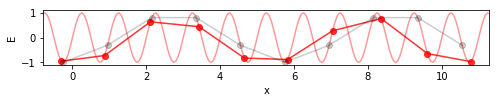

In [34]:
k, l = 10, 1.20
f_ext = 0.

f_zero = []
xi_zero = l*np.array( range(10), dtype=float ) - 0.25


xi = solve(xi_zero, f_ext, k, l, x_left=False)
     
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');

xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.plot(xi_zero, E_pot(xi_zero), '-ok', alpha=0.2);

xlim = (-0.5+np.min(xi), 0.5+np.max(xi))
plt.xlim(xlim);

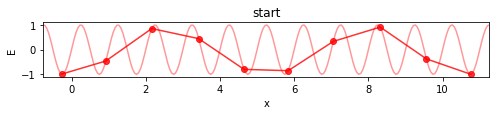

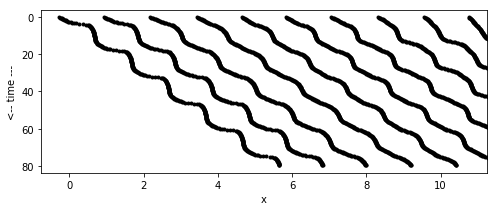

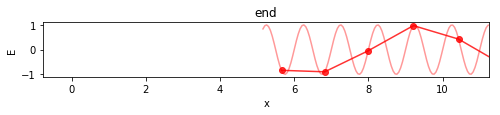

In [35]:
k, l = 20, 1.200
f_ext = 0.15

xi = l*np.array( range(10), dtype=float ) - 0.25
xi = solve(xi, 0, k, l, x_left=False)
    
xlim = (-0.5+np.min(xi), 0.5+np.max(xi))

# Start graph
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');
xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.title('start')
plt.xlim(xlim);

# in time
plt.figure(figsize=(8,3))
for i in range(400):
    plt.plot(xi, [0.2*i]*len(xi), '.k')
    xi[0] += v
    xi = solve(xi, f_ext, k, l, x_left=False, n=5)

     
plt.gca().invert_yaxis()
plt.xlabel('x'); plt.ylabel('<-- time ---');
plt.xlim(xlim);

# end graph
plt.figure(figsize=(8,1))
plt.xlabel('x'); plt.ylabel('E');
xp = np.linspace(-0.5+np.min(xi), 0.5+np.max(xi), 230)
plt.plot(xp, E_pot(xp), 'r', alpha=0.4);
plt.plot(xi, E_pot(xi), '-or', alpha=0.8);
plt.xlim(xlim); plt.title('end');